number of fasta record: 94
shortest sequence length: 572
longest sequence length: 789


Text(0, 0.5, 'Count')

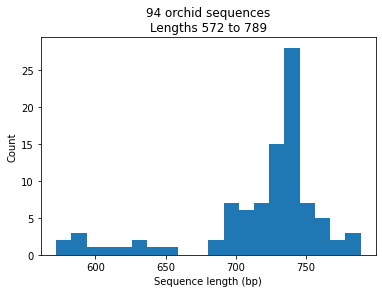

In [2]:
from Bio import SeqIO
sizes = [len(recT) for recT in SeqIO.parse("ls_orchid.fa", "fasta")]
print("number of fasta record: %i" % len(sizes)) # number of all fasta record
print("shortest sequence length: %i" % min(sizes)) # shortest sequence length
print("longest sequence length: %i" % max(sizes)) # longest sequence length

from matplotlib import pyplot as plt

n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
fig, axs = plt.subplots(1, 1)

# We can set the number of bins with the `bins` kwarg
axs.hist(sizes, bins=n_bins)
axs.set_title(
    "%i orchid sequences\nLengths %i to %i" % (len(sizes), min(sizes), max(sizes))
)
axs.set_xlabel("Sequence length (bp)")
axs.set_ylabel("Count")

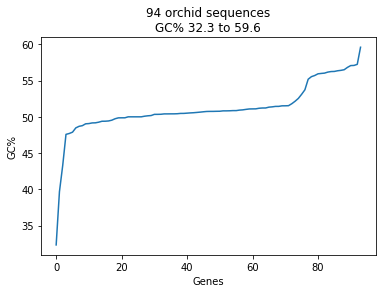

In [11]:
## plot GC content
from Bio import SeqIO
from Bio.SeqUtils import GC

gc_values = sorted(GC(rec.seq) for rec in SeqIO.parse("ls_orchid.fa", "fasta"))

from matplotlib import pyplot as plt


plt.title(
    "%i orchid sequences\nGC%% %0.1f to %0.1f"
    % (len(gc_values), min(gc_values), max(gc_values))
)

plt.xlabel("Genes")
plt.ylabel("GC%")

plt.plot(gc_values)
plt.show()

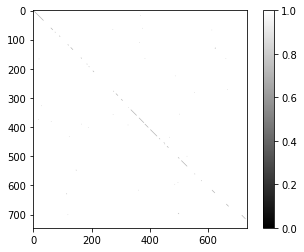

In [8]:
# nucleotide dot plot
from Bio import SeqIO
from matplotlib import pyplot as plt

# get the first two sequences
with open("ls_orchid.fa") as in_handle:
    record_iterator = SeqIO.parse(in_handle, "fasta")
    rec_one = next(record_iterator)
    rec_two = next(record_iterator)
    
## compiling a similarity matrix
window = 7
seq_one = rec_one.seq.upper()
seq_two = rec_two.seq.upper()
data = [
    [
        (seq_one[i : i + window] != seq_two[j : j + window])
        for j in range(len(seq_one) - window)
    ]
    for i in range(len(seq_two) - window)
]

# display image
plt.imshow(data, cmap='gray')

plt.colorbar()